In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
import plotly.express as px

In [4]:
air = pd.read_excel("C:/Users/VISHAL S PANCHANGE/Downloads/EastWestAirlines.xlsx",sheet_name = "data")

In [5]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
air.rename(columns ={'Award?':'Award',"ID#":"ID"}, inplace =True)

In [7]:
air.set_index('ID', inplace = True)
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [9]:
air.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [10]:
air.duplicated().sum()

1

In [19]:
df1 = air.drop_duplicates()

In [20]:
df1.shape

(3998, 11)

In [22]:
scaler = StandardScaler()
std_df = scaler.fit_transform(df1)
std_df

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

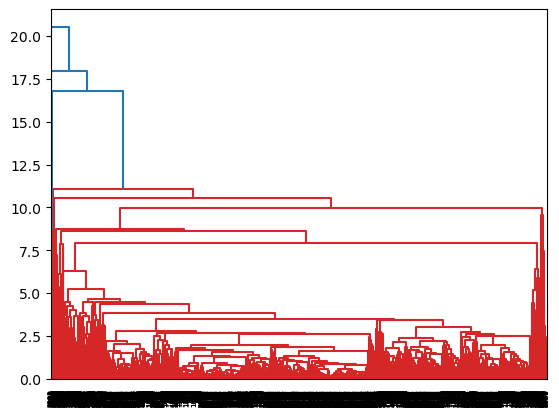

In [23]:
dendrogram =sch.dendrogram(sch.linkage(std_df,method = "average"))

In [37]:
hc = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage = "average")

In [38]:
y_hc = hc.fit_predict(std_df)
clusters = pd.DataFrame(y_hc)
clusters.head()

,0
0,0
1,0
2,0
3,0
4,0


In [39]:
from sklearn.metrics import silhouette_score as sil
sil(std_df, y_hc)

0.8110876003700274

In [40]:
nc = [2,3,4,5,6,7]
sc_score = []
for i in nc:
    hc = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'average')

    y = hc.fit_predict(std_df)
    sc_score.append(sil(std_df,y))

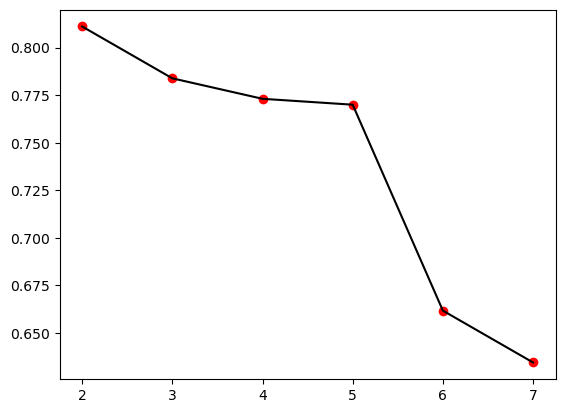

In [41]:
plt.plot(nc,sc_score, color="black")
plt.scatter(nc,sc_score,color = "red")
plt.show()

In [33]:
df1["Clusters"] = clusters
df1.head()

C:\Users\VISHAL S PANCHANGE\AppData\Local\Temp\ipykernel_10940\3851211824.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0.0
2,19244,0,1,1,1,215,2,0,0,6968,0,0.0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
4,14776,0,1,1,1,500,1,0,0,6952,0,0.0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0


In [42]:
df1.sort_values('Clusters')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0.0
2659,88563,0,4,1,1,42410,27,0,0,2567,0,0.0
2660,25748,0,1,1,1,0,0,0,0,2566,0,0.0
2661,27102,0,3,1,1,27102,9,0,0,2563,0,0.0
2662,25824,0,3,1,1,17760,20,750,2,2559,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,NaN
4018,64385,0,1,1,1,981,5,0,0,1395,1,NaN
4019,73597,0,3,1,1,25447,8,0,0,1402,1,NaN


In [43]:
df1["Clusters"].value_counts()

0.0    3970
1.0       4
Name: Clusters, dtype: int64

### K-Means Clustering:-

In [44]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(i,random_state=0)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
fig = px.line(range(1, 11), wcss)
fig.update_layout(title = 'Elbow Method',
    xaxis_title = 'Number of clusters',
                 yaxis_title = 'WCSS')
fig.show()

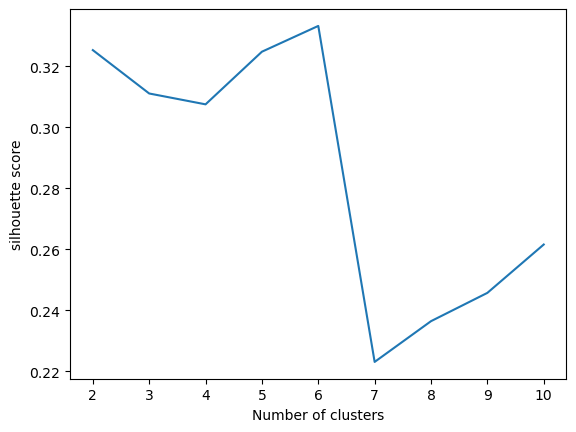

In [45]:
silhouettescore=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(std_df)
    silhouettescore.append(silhouette_score(std_df,kmeans.labels_))
    
plt.plot(range(2,11),silhouettescore)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()
# From here it is clear that at 6 number of cluster silhouette score is maximmum.

In [47]:
from sklearn.cluster import KMeans
clusters_new = KMeans(6, random_state=42)
clusters_new.fit(std_df)
from sklearn.metrics import silhouette_score
silhouette_score(std_df, clusters_new.labels_)

0.3332459698893672

In [48]:
clusters_new.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [49]:
pd.DataFrame(clusters_new.cluster_centers_) # As Feature Number is 11 so 11D.

,0,1,2,3,4,5,6,7,8,9,10
0,-0.299146,-0.131356,-0.606538,-0.098254,-0.060708,-0.519904,-0.498427,-0.186832,-0.199401,-0.204991,-0.354429
1,1.136620,0.414165,0.134350,-0.098254,-0.062774,0.656183,1.705282,3.770574,4.001600,0.271249,0.883721
2,0.639501,-0.084469,1.021840,-0.098254,15.644335,3.179317,1.714410,0.033207,0.059598,0.239582,0.337318
3,0.432463,-0.108316,1.193682,-0.098254,-0.054625,0.913143,0.744236,-0.081327,-0.089355,0.376518,0.573879
4,0.456896,6.730233,-0.043419,-0.098254,-0.062774,0.063535,0.065060,0.359571,0.394113,-0.071533,0.387106
5,-0.047067,-0.156263,-0.668386,9.037110,-0.062774,-0.101837,0.617584,0.087457,0.220232,-0.072774,0.051589


In [50]:
df1['Clusters'] = clusters_new.labels_
df1.head()

C:\Users\VISHAL S PANCHANGE\AppData\Local\Temp\ipykernel_10940\1651224399.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [51]:
df1.sort_values("Clusters")


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2557,30034,0,1,1,1,15816,6,0,0,2908,0,0
2559,46967,0,1,1,1,2000,9,0,0,2888,0,0
2560,103615,0,1,1,1,13668,15,1300,11,2896,1,0
2561,5110,0,1,1,1,0,0,0,0,2901,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
568,380930,0,2,2,1,22485,25,213,1,6539,1,5
3785,74531,0,1,2,1,10914,17,750,3,3456,1,5
3510,38292,0,1,2,1,12487,13,250,2,531,0,5


In [52]:
df1["Clusters"].value_counts() #frequencies of cluster formed by K-Means

0    2482
3    1254
1     143
4      61
5      43
2      15
Name: Clusters, dtype: int64

## DBSCAN Clustering:-
## (density-based spatial clustering of applications with noise)

In [55]:
dbscan = DBSCAN(eps = 5, min_samples = 8)
dbscan.fit(std_df)
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
from sklearn.metrics import silhouette_score
silhouette_score(std_df, dbscan.labels_)

0.5470619723528951

In [58]:
df1["Clusters"] = dbscan.labels_

C:\Users\VISHAL S PANCHANGE\AppData\Local\Temp\ipykernel_10940\766722488.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
df1.sort_values("Clusters")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
ID,,,,,,,,,,,,
389,28193,0,5,1,4,103456,32,0,0,6980,1,-1
1963,126873,0,4,1,5,95598,32,500,1,3880,1,-1
1934,82981,0,5,1,3,105325,44,1000,2,3964,1,-1
426,529886,7210,1,1,1,23866,26,7741,15,8296,1,-1
915,15835,0,2,1,5,112171,16,0,0,5825,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3811,374613,0,1,2,1,23592,31,5000,14,3463,1,2
3860,8150,0,1,2,1,14135,41,500,2,1676,1,2
398,11189,0,1,2,1,9044,20,0,0,8296,1,2


In [60]:
pd.DataFrame(dbscan.labels_).value_counts()

 0    3930
 2      28
-1      25
 1      15
dtype: int64

In [61]:
pd.DataFrame(dbscan.fit_predict(std_df)).value_counts()

 0    3930
 2      28
-1      25
 1      15
dtype: int64

## Conclusion :-
## DBSCAN gives best cluster with minimum in number and also gives us to know about outlier.
## however, cluster's no. get changes if we change the eps value that can be modified as per the client requirement.